<a href="https://colab.research.google.com/github/Tangjas20/MNIST_Dataset_recognition/blob/main/ELEC3612_TDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data() #Load MNIST dataset through Tensorflow.

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0: #Outputs GPU Information if a GPU runtime is connected
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat May 28 10:44:11 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Image Label is: 0


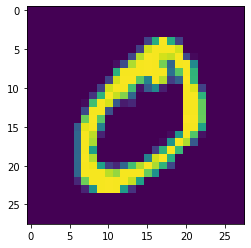

In [ ]:
#Plot an example image based on the image_index
import matplotlib.pyplot as plt

image_index = 1
print("Image Label is:", y_train[image_index])
plt.imshow(x_train[image_index])


In [ ]:
#Show how many training images there are and their size/features
x_train.shape


(60000, 28, 28)

In [ ]:
#Reshaping and processing data. It is normalised and prepped to be used in TF/Keras
x_train.shape
image_size = 28
num_train_images = 60000
num_test_images = 10000

x_train = x_train.reshape(num_train_images, image_size, image_size, 1).astype('float32')
x_test = x_test.reshape(num_test_images, image_size, image_size, 1).astype('float32')
input_shape = (image_size, image_size, 1)
#Normalising data values ranging from 0-1
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)


x_train shape: (60000, 28, 28, 1)


In [ ]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(56, kernel_size=(6, 6), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu)) # Create fully connected layers (New Neuron layer)
model.add(Dense(128)) # Tried Leaky Relu, but normal relu works better
model.add(Dropout(0.2)) # Prevents overfitting, randomly sets outgoing edge sof hidden units to 0

model.add(Dense(10, activation=tf.nn.softmax)) # 10 classes and will pick the one with the greatest numerical value


In [ ]:

import time
model.compile(optimizer='sgd', # SGD is used as it generalises predictions better than adam
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
start = time.time()
model.fit(x=x_train,y=y_train, epochs=15)
print("Total Model Fit Time Was: ", (time.time() - start)/60, "minutes")
#Epochs after 15 did not improve accuracy and at times decreased before increasing. 
#This could be a sign of over fitting to training data.


Epoch 1/15
1875/1875 [==============================] - 16s 3ms/step - loss: 0.4884 - accuracy: 0.8637
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1401 - accuracy: 0.9589
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1004 - accuracy: 0.9703
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0801 - accuracy: 0.9758
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0699 - accuracy: 0.9786
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0627 - accuracy: 0.9815
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0554 - accuracy: 0.9834
Epoch 8/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0507 - accuracy: 0.9849
Epoch 9/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0466 - accuracy: 0.9861
Epoch 10/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.04

In [ ]:
#Evaluate the performance - Finds Loss and Accuracy
model.evaluate(x_test, y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.0358 - accuracy: 0.9884


[0.03581686317920685, 0.9883999824523926]

In [ ]:
#Provides summary of the sequential mode and layers used
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 23, 23, 56)        2072      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 5, 5, 56)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1400)              0         
                                                                 
 dense (Dense)               (None, 128)               179328    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                        

Here are the possibilities for each number

0 7.566985686935368e-07
1 0.9998553991317749
2 4.4485710759545327e-07
3 3.4949116933802316e-09
4 6.277189095271751e-05
5 6.149528442023211e-09
6 1.4188280772486905e-07
7 7.980288501130417e-05
8 6.502671112684766e-07
9 2.9538092860548204e-08


Predicted Handwritten Digit is:  1


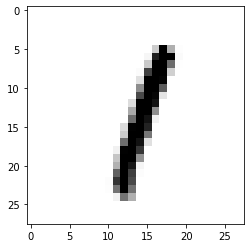

In [ ]:
import numpy as np
image_index = 5
image_to_predict = x_test[image_index].reshape(1, 28, 28, 1)
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(image_to_predict)
list1 = pred.tolist()[0]
print("Here are the possibilities for each number\n")
for count, i in enumerate(list1):
  print(count, i)
print("\n")

print("Predicted Handwritten Digit is: ", list1.index(max(list1)))

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test, batch_size=10000, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
confusion_mat = metrics.confusion_matrix(y_test, y_pred_bool, labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(classification_report(y_test, y_pred_bool))
print("\n\nConfusion Matrix:\n\n{}".format(confusion_mat))


1/1 [==============================] - 0s 240ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.98      0.99       892
           6       1.00      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.99       974
           9       1.00      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Confusion Matrix:

[[ 977    0    1    0    0    0    0    1    1    0]
 [   0 1133    1    1    0    0    0    0    0    0]
 [   2    1 1024    0    2    0    0    3    0    0]
 [   0  

## SVM implementation

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
import tensorflow as tf
import time

In [ ]:
(x_train1, y_train), (x_test1, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
#flattening the images
train_samples = len(x_train1)
test_samples = len(x_test1)
x_train = x_train1.reshape((train_samples, -1))
x_test = x_test1.reshape((test_samples, -1))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
# Reducing the size of the train and test data, this is not necessary but makes the runtime shorter


x_train = x_train[0:60000]
y_train = y_train[0:60000]
x_test = x_test[0:10000]
y_test = y_test[0:10000]
print(x_train.shape)
print(x_test.shape)

start = time.time()
svc = svm.SVC(kernel = 'poly')
svc.fit(x_train,y_train)
print("Time taken for model to be fitted was: " + str(time.time()-start) + " seconds.")

(60000, 784)
(10000, 784)
Time taken for model to be fitted was: 311.5002245903015 seconds.


In [ ]:
y_pred = svc.predict(x_test)
print("The first 100 elements of the predicted Data is:")
print(y_pred[0:100])
print("The first 100 elements of the actual data is:")
print(y_test[0:100])


print("\nThe accuracy score for the model is:")
print(accuracy_score(y_test, y_pred))

The first 100 elements of the predicted Data is:
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]
The first 100 elements of the actual data is:
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]

The accuracy score for the model is:
0.9771


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.97      0.99      0.98      1135
           2       0.98      0.97      0.98      1032
           3       0.98      0.97      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.97      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.98      0.97      0.98       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000


Confusion Matrix:


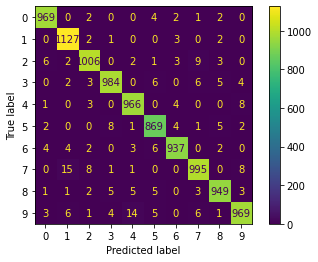

In [ ]:
plot = plot_confusion_matrix(svc, x_test, y_test)
classification_rep = metrics.classification_report(y_test, y_pred)
print(classification_rep)
print("\nConfusion Matrix:")